
# Linear Regression for Prediction 

The goal of this notebook is to walk you through the mechanics of exploring complex datasets and designing a predictive model using linear regression. 

The example we will use is [Lending Club](https://www.lendingclub.com) , a peer-to-peer lender. 
The goal is to come up with an algorithm that recommends the interest rate to charge to new loans. The lending club has made historical data publicly available and we will use it for this exercise.


**Load the data and any libraries**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv("../Data/LendingClub_Data.csv", skiprows=1, low_memory=False) # skip the first row, low_memory to avoid dtype warnings
df.head()


,int_rate,loan_amnt,term (months),installment,dti,delinq_2yrs,annual_inc,grade,emp_title,emp_length,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,0.05,8000,36.0,241.28,2.11,0.0,50000.0,A,NaN,5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,6000,36.0,180.96,5.73,0.0,52800.0,A,coral graphics,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.05,6500,36.0,196.04,17.68,0.0,35352.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.05,8000,36.0,241.28,22.71,0.0,79200.0,A,Honeywell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.05,5500,36.0,165.88,5.75,0.0,240000.0,A,"O T Plus, Inc",10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Lending Club Data Dictionary**

| Column Name           | Description |
|------------------------|-------------|
| `int_rate`             | Interest rate on the loan (annual percentage). |
| `loan_amnt`            | The amount of the loan applied for by the borrower. |
| `term (months)`        | The loan term in months (e.g., 36 or 60 months). |
| `installment`          | The fixed monthly payment owed by the borrower if the loan is funded. |
| `dti`                  | Debt-to-Income ratio: borrower’s monthly debt payments divided by monthly income. |
| `delinq_2yrs`          | Number of times borrower has been delinquent (30+ days) in the past 2 years. |
| `annual_inc`           | The self-reported annual income of the borrower. |
| `grade`                | Lending Club’s assigned loan grade (A–G). |
| `emp_title`            | Borrower’s job title (free text, messy, many unique values). |
| `emp_length`           | Employment length in years (e.g., "10+ years", "3 years"). |
| `home_ownership`       | The borrower’s home ownership status (e.g., RENT, OWN, MORTGAGE). |
| `verification_status`  | Indicates if the borrower’s income was verified. |
| `issue_d`              | The date the loan was issued (month-year). |
| `zip_code`             | Borrower’s zip code (masked, first 3 digits only). |
| `addr_state`           | The borrower’s state of residence. |
| `loan_status`          | Current status of the loan (e.g., Fully Paid, Charged Off, Current). |
| `desc`                 | Loan description provided by the borrower (free text, often messy). |
| `purpose`              | Category of the loan purpose (e.g., debt consolidation, credit card, home improvement). |
| `title`                | Loan title provided by the borrower (free text, often overlaps with purpose). |


In [2]:
df.shape

(42538, 80)

In [3]:
df.describe()

,int_rate,term (months),installment,dti,delinq_2yrs,annual_inc,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
count,37869.000000,37869.000000,37869.000000,37869.000000,37869.000000,3.786900e+04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2660.0,2720.000000
mean,0.120264,42.461222,332.581354,13.284162,0.145554,6.914786e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.235294
std,0.037264,10.645418,214.289826,6.686636,0.491173,6.166703e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,116.061941
min,0.050000,36.000000,15.680000,0.000000,0.000000,4.000000e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
25%,0.090000,36.000000,168.590000,8.140000,0.000000,4.080000e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
50%,0.120000,36.000000,288.330000,13.360000,0.000000,5.953400e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
75%,0.150000,60.000000,449.050000,18.580000,0.000000,8.280000e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
max,0.250000,60.000000,1305.190000,29.990000,11.000000,6.000000e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6053.000000


In [4]:
df.dtypes

int_rate         float64
loan_amnt         object
term (months)    float64
installment      float64
dti              float64
                  ...   
Unnamed: 75      float64
Unnamed: 76      float64
Unnamed: 77      float64
Unnamed: 78      float64
Unnamed: 79      float64
Length: 80, dtype: object

**Quick cleaning of the data**

In [ ]:
# DATA CLEANING STEPS

# Step 1: Select only the first 19 columns (removes extra columns that may be empty or irrelevant)
df_clean = df.iloc[:,:19]

# Step 2: Remove rows where interest rate is missing (our target variable must be present)
df_clean = df_clean[ df_clean['int_rate'].notna() ]

# Step 3: Convert issue_d to datetime format for proper date handling
# Format '%m/%d/%Y' specifies month/day/year, errors='coerce' converts invalid dates to NaT
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%m/%d/%Y', errors='coerce')

# Step 4: Convert categorical variables to category dtype for better memory usage and analysis
df_clean['term'] = df_clean['term (months)'].astype('category')  # Loan term (e.g., 36 months, 60 months)
df_clean['delinq_2yrs'] = df_clean['delinq_2yrs'].astype('category')  # Number of delinquencies in past 2 years

# Step 5: Ensure loan_amnt is numeric (convert any non-numeric values to NaN)
df_clean['loan_amnt'] = pd.to_numeric(df_clean['loan_amnt'], errors='coerce')

# Step 6: Remove columns that are either redundant or not useful for analysis
# - 'emp_title': Too many unique values, not standardized
# - 'installment': Can be calculated from loan_amnt and term
# - 'term (months)': Redundant since we created 'term' category above
df_clean = df_clean.drop(columns=['emp_title', 'installment', 'term (months)'])

# Display the first few rows to verify cleaning
df_clean.head()

,int_rate,loan_amnt,dti,delinq_2yrs,annual_inc,grade,emp_length,home_ownership,verification_status,issue_d,zip_code,addr_state,loan_status,desc,purpose,title,term
0,0.05,8000,2.11,0.0,50000.0,A,5 years,MORTGAGE,Verified,2011-09-01,977xx,OR,Fully Paid,Borrower added on 09/08/11 > Consolidating d...,debt_consolidation,Credit Card Payoff $8K,36.0
1,0.05,6000,5.73,0.0,52800.0,A,< 1 year,MORTGAGE,Source Verified,2011-09-01,228xx,VA,Charged Off,Borrower added on 09/08/11 > excellent credi...,vacation,bad choice,36.0
2,0.05,6500,17.68,0.0,35352.0,A,NaN,MORTGAGE,Not Verified,2011-09-01,864xx,AZ,Fully Paid,Borrower added on 09/09/11 > I plan to use t...,credit_card,Credit Card Loan,36.0
3,0.05,8000,22.71,0.0,79200.0,A,NaN,MORTGAGE,Verified,2011-09-01,322xx,FL,Fully Paid,Borrower added on 09/08/11 > Home improvemen...,home_improvement,Home Improvement,36.0
4,0.05,5500,5.75,0.0,240000.0,A,10+ years,MORTGAGE,Source Verified,2011-09-01,278xx,NC,Fully Paid,NaN,car,Car Loan,36.0


In [6]:
df_clean.dtypes

int_rate                      float64
loan_amnt                       int64
dti                           float64
delinq_2yrs                  category
annual_inc                    float64
grade                          object
emp_length                     object
home_ownership                 object
verification_status            object
issue_d                datetime64[ns]
zip_code                       object
addr_state                     object
loan_status                    object
desc                           object
purpose                        object
title                          object
term                         category
dtype: object

**Exploratory Data Analysis**

**Histograms**

<Axes: xlabel='int_rate', ylabel='Count'>

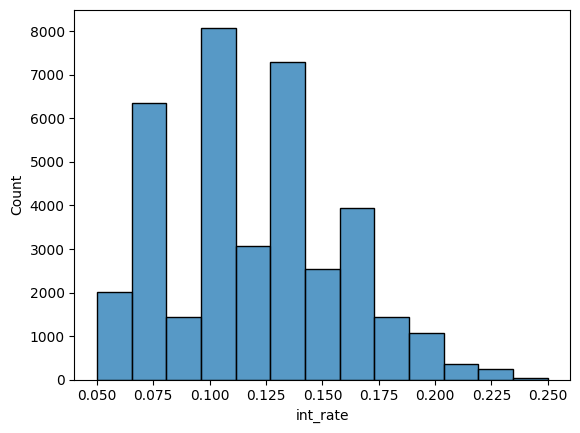

In [7]:
sns.histplot(data=df_clean, 
             x='int_rate',
             binwidth=0.015)
             

<Axes: xlabel='int_rate', ylabel='Count'>

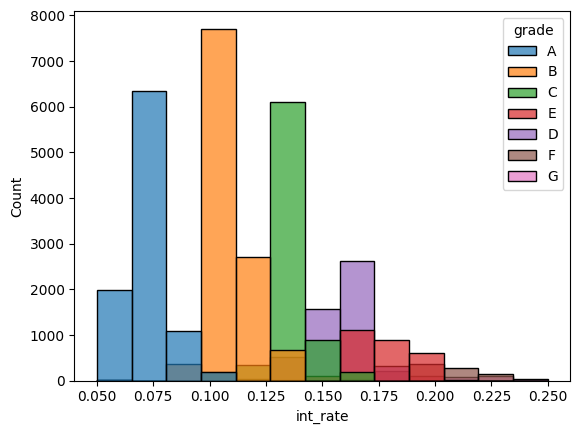

In [8]:
sns.histplot(data=df_clean, 
             x='int_rate', 
             hue='grade',
             multiple='layer',
             alpha=0.7,
             binwidth=0.015)

**Density Plot**

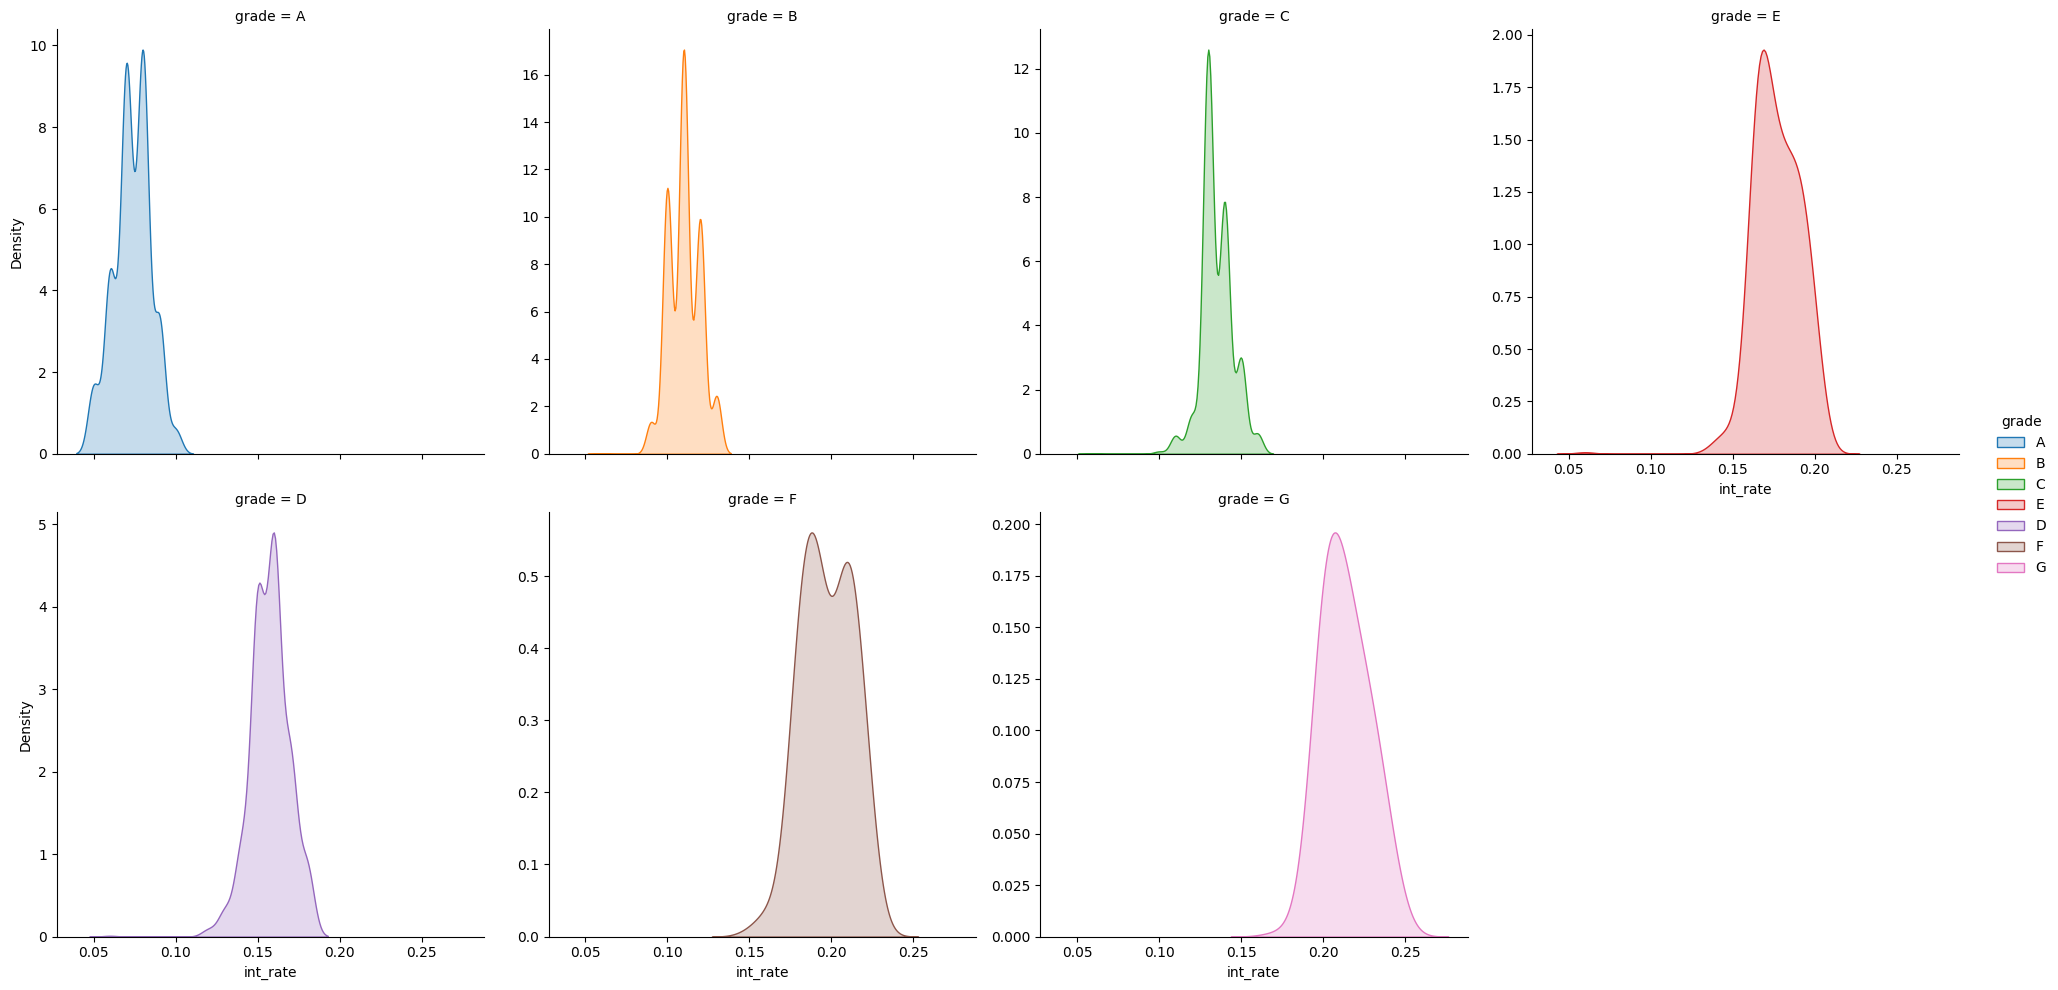

In [9]:
sns.displot(
    data=df_clean,
    x="int_rate",
    hue="grade",         # give each grade its own color (like fill)
    kind="kde",
    bw_adjust= 2,
    fill=True,
    facet_kws={"sharey": False},  # so y-axis scales independently per facet
    col="grade",         # facet by grade
    col_wrap=4          # wrap into rows of 4 plots
)

**Box plots**

<Axes: xlabel='int_rate', ylabel='home_ownership'>

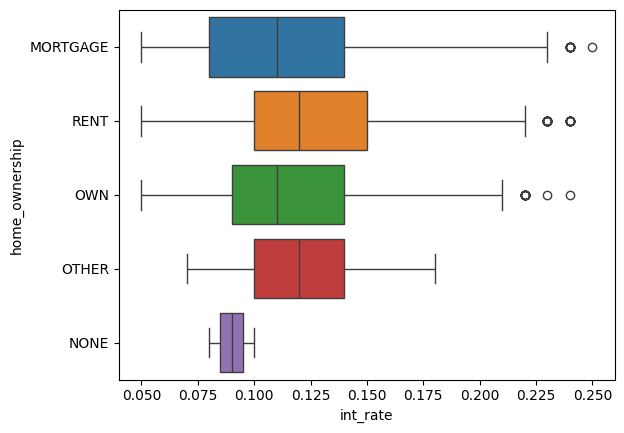

In [10]:
sns.boxplot(
    data=df_clean,
    y="home_ownership",   
    x="int_rate",
    hue="home_ownership",
    dodge=False,
)

**Scatter plot and regression lines**


<Axes: xlabel='loan_amnt', ylabel='int_rate'>

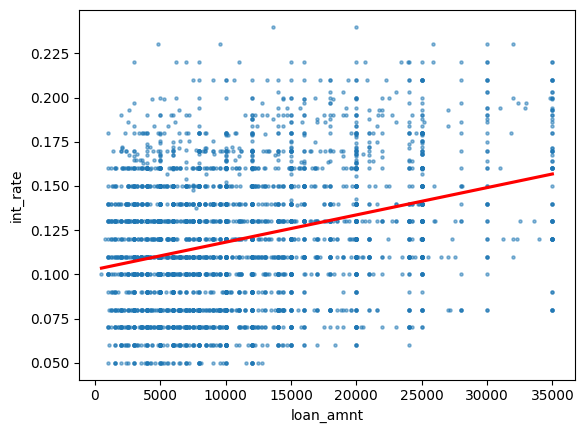

In [11]:
df_sample = df_clean.iloc[::10, :] # subsample just for visualisation purposes
sns.regplot(
    data=df_sample,
    x="loan_amnt",
    y="int_rate",
    scatter_kws={"s": 5, "alpha": 0.5},  # size ~0.1 in ggplot
    line_kws={"color": "red"},           # regression line
    ci=None                              # se=0 (no confidence band)
)

<Axes: xlabel='annual_inc', ylabel='int_rate'>

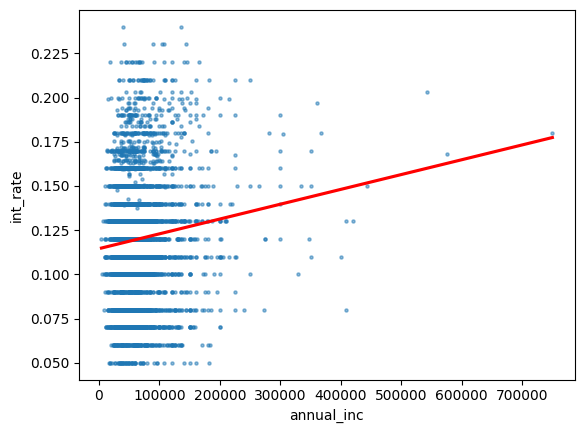

In [12]:
sns.regplot(
    data=df_sample,
    x="annual_inc",
    y="int_rate",
    scatter_kws={"s": 5, "alpha": 0.5},  # size ~0.1 in ggplot
    line_kws={"color": "red"},           # regression line
    ci=None                              # se=0 (no confidence band)
)

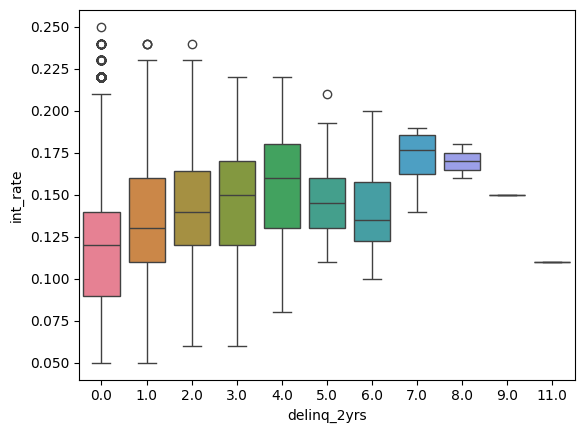

In [13]:
sns.boxplot(
    data=df_clean,
    x="delinq_2yrs",
    y="int_rate",
    hue="delinq_2yrs",     # colour by delinq_2yrs
    dodge=False,
)
plt.legend([], [], frameon=False)

**Do delinquencies in the last two years impact interest rates?**

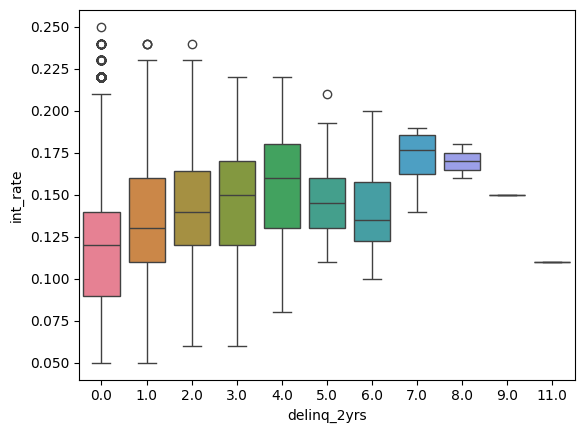

In [14]:
sns.boxplot(
    data=df_clean,
    x="delinq_2yrs",
    y="int_rate",
    hue="delinq_2yrs"    # colour by delinq_2yrs
)
plt.legend([], [], frameon=False)

**Correlation Table**

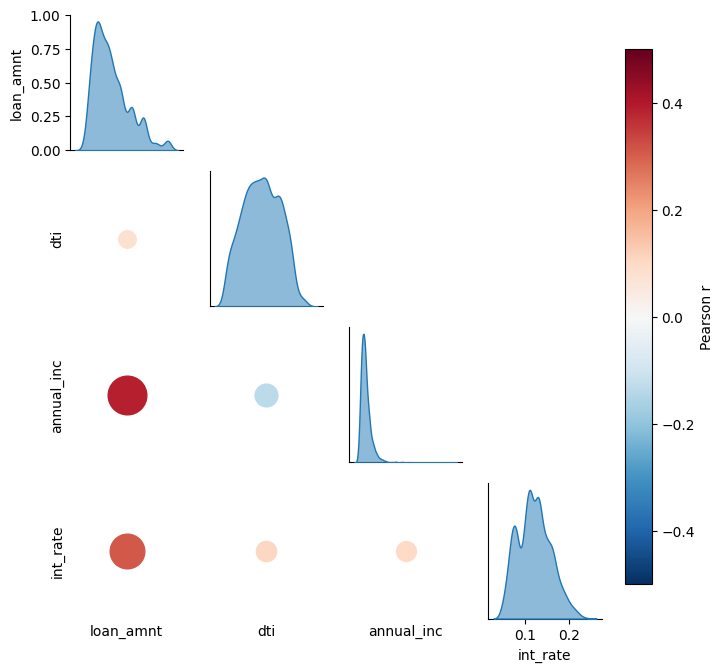

In [15]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import Normalize

vars_order = ['loan_amnt','dti','annual_inc','int_rate']
df_plot = df_clean.iloc[::10, :].copy()

# bubble plot for correlations
def corr_dot(x, y, **kws):
    ax = plt.gca()
    x, y = np.asarray(x, float), np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    r = 0.0 if m.sum() < 2 else np.corrcoef(x[m], y[m])[0, 1]
    # scatter bubble in middle of cell
    ax.scatter(0.5, 0.5, s=2000*abs(r), c=[[r]],
               cmap=kws["cmap"], norm=kws["norm"],
               transform=ax.transAxes)
    # clean ticks & spines but KEEP axis for labels
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values(): spine.set_visible(False)

# hide upper triangle completely
def hide_axis(*args, **kwargs):
    plt.gca().set_visible(False)

g = sns.PairGrid(df_plot, vars=vars_order, diag_sharey=False, height=1.7)
# diagonal: filled KDE
g.map_diag(
    sns.kdeplot,
    fill=True, alpha=0.5
)
norm = Normalize(-0.5, 0.5)
g.map_lower(corr_dot, norm=norm, cmap="RdBu_r")
g.map_upper(hide_axis)

# labels for lower axes
for ax, lab in zip(g.axes[-1, :], vars_order): ax.set_xlabel(lab)
for ax, lab in zip(g.axes[:, 0], vars_order):  ax.set_ylabel(lab)

# colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="RdBu_r"); sm.set_array([])
g.fig.colorbar(sm, ax=g.axes, fraction=0.046, pad=0.04, label="Pearson r")

plt.show()


**Linear Regression**

The simplest linear regression: fitting the mean to the data

In [16]:
model0 = smf.ols('int_rate ~ 1', data=df_clean).fit() 
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Sep 2025   Prob (F-statistic):                nan
Time:                        10:41:46   Log-Likelihood:                 70845.
No. Observations:               37869   AIC:                        -1.417e+05
Df Residuals:                   37868   BIC:                        -1.417e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1203      0.000    628.034      0.0

**Univariate linear regression: using loan_amnt as a predictor**

In [17]:
model1 = smf.ols('int_rate ~ loan_amnt', data=df_clean).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     4067.
Date:                Thu, 18 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:41:46   Log-Likelihood:                 72776.
No. Observations:               37869   AIC:                        -1.455e+05
Df Residuals:                   37867   BIC:                        -1.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1028      0.000    312.155      0.0

**Multiple linear regression: using multiple predictors**

In [18]:
# Multiple linear regression model with several predictors

model0_multiple = smf.ols('int_rate ~ term + annual_inc + dti + grade', data=df_clean).fit()
print(model0_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 4.779e+04
Date:                Thu, 18 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:41:46   Log-Likelihood:             1.1845e+05
No. Observations:               37869   AIC:                        -2.369e+05
Df Residuals:                   37859   BIC:                        -2.368e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0725      0.000    443.620   

**Understanding the Model Output Notes**

The notes at the bottom of the regression summary provide important warnings about potential issues:

**Note [1]: Standard Errors Assumption**
- This note appears on virtually all regression outputs
- It reminds us that the standard errors (and therefore p-values and confidence intervals) are only valid if the model assumptions are met
- Key assumptions include:
  - **Homoscedasticity**: Constant variance of errors
  - **Independence**: Errors are not correlated with each other
  - **Correct specification**: We haven't omitted important variables or included incorrect functional forms
- If these assumptions are violated, our p-values and confidence intervals may be misleading

**Note [2]: High Condition Number (Multicollinearity Warning)**
- Condition number = 2.44e+04 = 24,400 (very large!)
- **What it means**: There's strong multicollinearity among our predictors
- **Multicollinearity** occurs when predictor variables are highly correlated with each other
- **Problems this causes**:
  - Coefficient estimates become unstable (small data changes → big coefficient changes)
  - Standard errors inflate (making tests less powerful)
  - Difficult to interpret individual coefficient effects
  - Model predictions can still be accurate, but individual coefficients are unreliable

**Potential Solutions**:
1. **Remove highly correlated variables** (check correlation matrix)
2. **Center/standardize variables** (especially helpful for categorical variables)
3. **Use regularization methods** (Ridge, Lasso regression)
4. **Collect more data** (sometimes helps reduce multicollinearity effects)
5. **Principal Component Analysis** (combine correlated variables)

In our case, variables like `annual_inc`, `dti`, and `grade` are likely highly correlated since they all relate to borrower creditworthiness.